# WorldCoin Price Analysis and Prediction

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


### Data Exploration

In [2]:
df = pd.read_csv("worldcoin-org_2019-06-19_2024-06-17.csv")
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-06-16,2024-06-17,435.434564,450.283266,424.506973,444.698612,3.149406e+10,9.786989e+10
1,2024-06-15,2024-06-16,442.207514,450.754333,433.511423,435.805905,4.558511e+10,9.913209e+10
2,2024-06-14,2024-06-15,471.470823,479.991323,431.186058,442.021938,4.505473e+10,1.028360e+11
3,2024-06-13,2024-06-14,494.564923,500.807162,466.376275,468.211321,5.922474e+10,1.073532e+11
4,2024-06-12,2024-06-13,489.541653,526.686680,469.800441,497.223618,7.096327e+10,1.118204e+11


### Data cleaning

In [3]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [4]:
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-06-16,2024-06-17,435.434564,450.283266,424.506973,444.698612,3.149406e+10,9.786989e+10
1,2024-06-15,2024-06-16,442.207514,450.754333,433.511423,435.805905,4.558511e+10,9.913209e+10
2,2024-06-14,2024-06-15,471.470823,479.991323,431.186058,442.021938,4.505473e+10,1.028360e+11
3,2024-06-13,2024-06-14,494.564923,500.807162,466.376275,468.211321,5.922474e+10,1.073532e+11
4,2024-06-12,2024-06-13,489.541653,526.686680,469.800441,497.223618,7.096327e+10,1.118204e+11
...,...,...,...,...,...,...,...,...
324,2023-07-28,2023-07-29,266.303801,286.533403,264.554328,285.644185,6.007178e+10,2.919856e+10
325,2023-07-27,2023-07-28,287.676920,295.834139,268.693036,269.989743,9.477407e+10,2.970630e+10
326,2023-07-26,2023-07-27,293.852710,321.444574,282.445740,289.173453,1.894057e+11,3.163373e+10
327,2023-07-25,2023-07-26,278.619394,309.644293,245.956788,293.075495,1.737368e+11,2.890207e+10


In [5]:
df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap
count,329,329,329.000000,329.000000,329.000000,329.000000,3.290000e+02,3.290000e+02
mean,2024-01-04 00:00:00,2024-01-05 00:00:00,470.463118,498.204874,446.715460,471.084717,8.741595e+10,7.296562e+10
min,2023-07-24 00:00:00,2023-07-25 00:00:00,129.619325,133.331179,125.152690,129.415215,1.123129e+10,1.693024e+10
25%,2023-10-14 00:00:00,2023-10-15 00:00:00,234.036908,243.056730,226.733347,235.536058,3.139120e+10,2.801104e+10
50%,2024-01-04 00:00:00,2024-01-05 00:00:00,323.497383,350.820082,314.468605,324.629437,5.479882e+10,3.890089e+10
75%,2024-03-26 00:00:00,2024-03-27 00:00:00,632.891120,659.483032,604.013512,633.935784,9.869635e+10,1.338980e+11
max,2024-06-16 00:00:00,2024-06-17 00:00:00,1498.359952,1512.852501,1209.552481,1487.117949,5.710208e+11,1.928213e+11
std,NaN,NaN,301.046221,321.413742,280.968519,300.654814,9.566820e+10,5.560866e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       329 non-null    datetime64[ns]
 1   End         329 non-null    datetime64[ns]
 2   Open        329 non-null    float64       
 3   High        329 non-null    float64       
 4   Low         329 non-null    float64       
 5   Close       329 non-null    float64       
 6   Volume      329 non-null    float64       
 7   Market Cap  329 non-null    float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 20.7 KB


### EDA

c:\Users\Randell\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


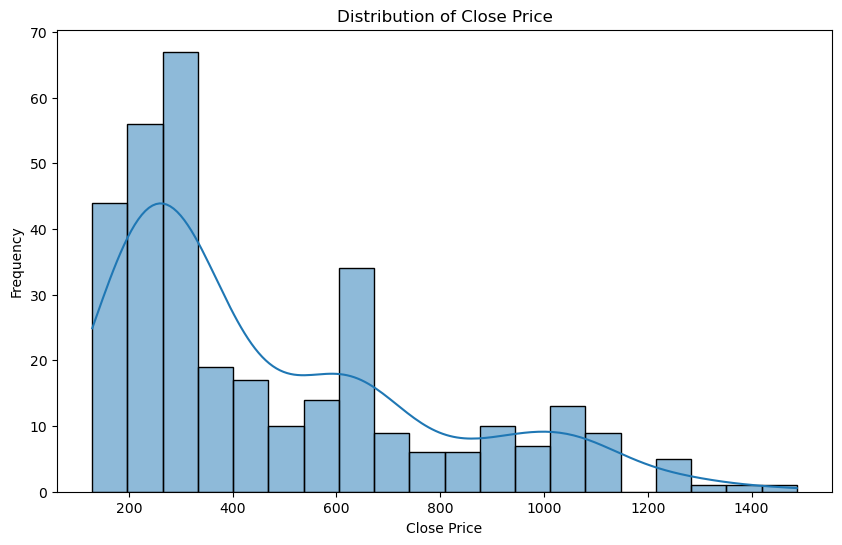

In [7]:
# Plot the distribution of the target variable 'Close'
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

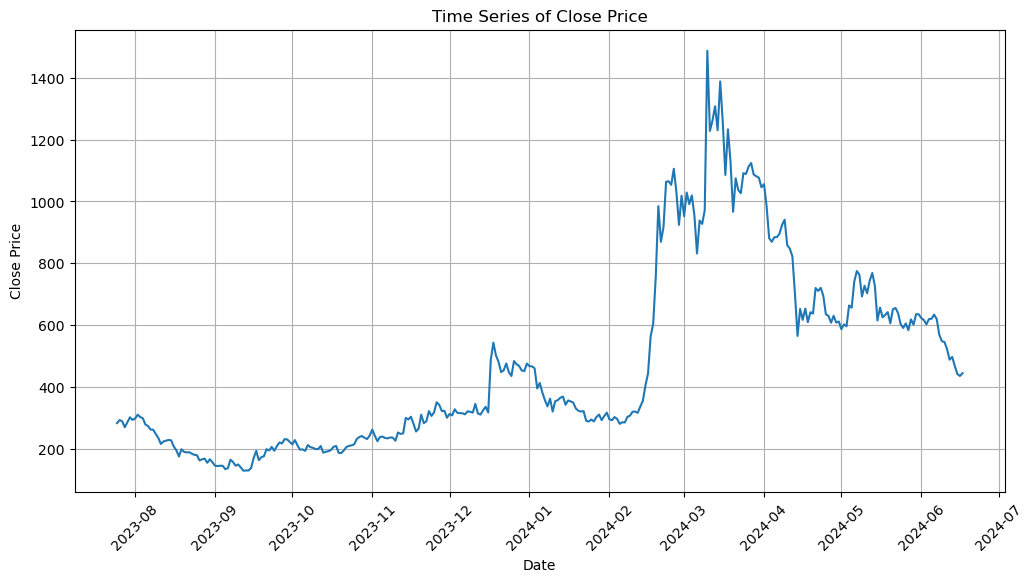

In [8]:
# Plot time series of 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(df['End'], df['Close'], linestyle='-')
plt.title('Time Series of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Model Development

In [9]:
X = df[["Open", "High", "Low", "Volume", "Market Cap"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:",mse)

Mean Squared Error: 932.2258294055507


In [12]:

# Initialize the models
linear_reg_model = LinearRegression()
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# Train the models
linear_reg_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Make predictions
linear_reg_predictions = linear_reg_model.predict(X_test)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)

print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("Gradient Boosting Mean Squared Error:", gradient_boosting_mse)
print("Support Vector Regressor Mean Squared Error:", svr_mse)


Linear Regression Mean Squared Error: 340.4899278846117
Gradient Boosting Mean Squared Error: 955.620423310595
Support Vector Regressor Mean Squared Error: 87058.00330021947


### Testing the models

In [13]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:
Predicted Close Price: [638.97477237]


In [ ]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = linear_reg_model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:
Predicted Close Price: [1034.3342983]
